<a href="https://colab.research.google.com/github/kdambrowski/Data_science/blob/main/clasyfication_and_roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 194 (delta 33), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (194/194), 35.45 MiB | 8.87 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Updating files: 100% (127/127), done.


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas._libs.hashtable import value_count

import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes


def calculate_metrics(target, prediction, average='weighted'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(
        target, prediction, average=average, zero_division=0)
    
    recall = recall_score(target, prediction, average=average, zero_division=0)
    f1 = f1_score(target, prediction, average=average, zero_division=0)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)

y = wine.pop('class')
X = wine

['one' 'two' 'three']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y)

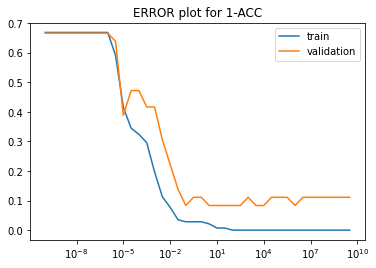

In [ ]:
train_errs = list()
test_errs = list()

C_values = [10.0**x for x in np.arange(-10, 10, 0.5)]

for C_value in C_values:
  lr = LogisticRegression(penalty="l2", C=C_value, solver='liblinear')
  lr.fit(X_train, y_train)
  train_errs.append(1.0 - lr.score(X_train, y_train))
  test_errs.append(1.0 - lr.score(X_test, y_test))

plt.semilogx(C_values, train_errs, C_values, test_errs)
plt.title('ERROR plot for 1-ACC')
plt.legend(("train", "validation"))
plt.show()

In [ ]:
lr = LogisticRegression(penalty="l2", C=0.001, solver='liblinear')
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)


print_results(calculate_metrics(y_train, y_pred_train, average='weighted')
, classifier_id="LR C=0.001 TRAIN SET")
print_results(calculate_metrics(y_test, y_pred, average='weighted')
, classifier_id="LR C=0.001 TEST SET")

Results for LR C=0.001 TRAIN SET
----
  Accuracy:  0.8028169014084507
  Precision: 0.840590319463559
  Recall:    0.8028169014084507
  F1 score:  0.7837229768204933
  Mislabeled 28 out of 142


Results for LR C=0.001 TEST SET
----
  Accuracy:  0.5833333333333334
  Precision: 0.7137681159420289
  Recall:    0.5833333333333334
  F1 score:  0.5317362817362817
  Mislabeled 15 out of 36




In [ ]:
lr = LogisticRegression(penalty="l2", C=1000, solver='liblinear')
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

print_results(calculate_metrics(y_train, y_pred_train, average='weighted')
, classifier_id="LR C=1000 TRAIN SET")
print_results(calculate_metrics(y_test, y_pred, average='weighted')
, classifier_id="LR C=1000 TEST SET")


Results for LR C=1000 TRAIN SET
----
  Accuracy:  1.0
  Precision: 1.0
  Recall:    1.0
  F1 score:  1.0
  Mislabeled 0 out of 142


Results for LR C=1000 TEST SET
----
  Accuracy:  0.8888888888888888
  Precision: 0.8888888888888888
  Recall:    0.8888888888888888
  F1 score:  0.8888888888888888
  Mislabeled 4 out of 36




In [ ]:
lr = LogisticRegression(penalty="l2", C=1, solver='liblinear')
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

print_results(calculate_metrics(y_train, y_pred_train, average='weighted')
, classifier_id="LR C=1 TRAIN SET")
print_results(calculate_metrics(y_test, y_pred, average='weighted')
, classifier_id="LR C=1 TEST SET")

Results for LR C=1 TRAIN SET
----
  Accuracy:  0.971830985915493
  Precision: 0.971830985915493
  Recall:    0.971830985915493
  F1 score:  0.971830985915493
  Mislabeled 4 out of 142


Results for LR C=1 TEST SET
----
  Accuracy:  0.8888888888888888
  Precision: 0.8888888888888888
  Recall:    0.8888888888888888
  F1 score:  0.8888888888888888
  Mislabeled 4 out of 36




In [ ]:
lr = LogisticRegression(penalty="l2", solver='liblinear')

In [ ]:
searcher = GridSearchCV(estimator=lr, param_grid={'C': C_values}, cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1e-10, 3.1622776601683795e-10, 1e-09,
                               3.1622776601683795e-09, 1e-08,
                               3.162277660168379e-08, 1e-07,
                               3.162277660168379e-07, 1e-06,
                               3.162277660168379e-06, 1e-05,
                               3.1622776601683795e-05, 0.0001,
                               0.00031622776601683794, 0.001,
                               0.0031622776601683794, 0.01, 0.03162277660168379,
                               0.1, 0.31622776601683794, 1.0,
                               3.1622776601683795, 10.0, 31.622776601683793,
                               100.0, 316.22776601683796, 1000.0,
                               3162.2776601683795, 10000.0, 31622.776601683792, ...]})

In [ ]:
print(searcher.best_estimator_,
searcher.best_params_['C'],
searcher.best_params_)

LogisticRegression(solver='liblinear') 1.0 {'C': 1.0}


#grind search

In [ ]:
lr = LogisticRegression(penalty="l2", C= searcher.best_params_['C'],
                        solver='liblinear')
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

print_results(calculate_metrics(y_train, y_pred_train, average='weighted')
, classifier_id="LR C=0.1 TRAIN SET")
print_results(calculate_metrics(y_test, y_pred, average='weighted')
, classifier_id="LR C=0.1 TEST SET")

Results for LR C=0.1 TRAIN SET
----
  Accuracy:  0.971830985915493
  Precision: 0.971830985915493
  Recall:    0.971830985915493
  F1 score:  0.971830985915493
  Mislabeled 4 out of 142


Results for LR C=0.1 TEST SET
----
  Accuracy:  0.8888888888888888
  Precision: 0.8888888888888888
  Recall:    0.8888888888888888
  F1 score:  0.8888888888888888
  Mislabeled 4 out of 36




ROC ONE VS REST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
y_bin = label_binarize(y, classes=[0, 1, 2]) 
n_classes = y_bin.shape[1]
n_classes

3

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_bin, test_size=0.2, random_state=4)

In [ ]:
LogR = OneVsRestClassifier(LogisticRegression(penalty="l1", C=0.31, solver='liblinear'))

In [ ]:
y_score = LogR.fit(X_train2,y_train2).decision_function(X_test2)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr.keys(),tpr.keys(),roc_auc.keys()

(dict_keys([0, 1, 2]), dict_keys([0, 1, 2]), dict_keys([0, 1, 2]))

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

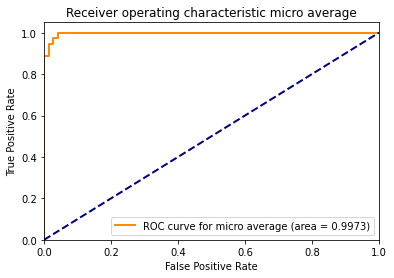

In [ ]:
plt.figure()
lw = 2 # szerokość linii
plt.plot(
    fpr['micro'],
    tpr['micro'],
    color="darkorange",
    lw=lw,
    label="ROC curve for micro average (area = %0.4f)" % roc_auc['micro'],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic micro average")
plt.legend(loc="lower right")
plt.show()

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [ ]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])


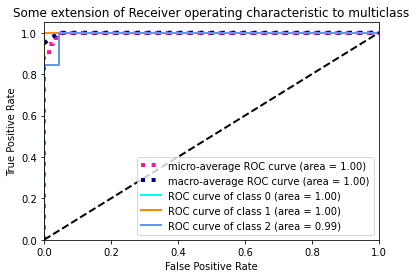

In [ ]:

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()